In [38]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
df = pd.read_csv("C:/Users/91801/Desktop/Insurance Project/dataset/insurance_data.csv")
df.head()

,Policy_ID,Customer_Age,Gender,Policy_Type,Annual_Income,Property_Age,Claim_History,Risk_Score,Premium_Amount,Claim_Amount,fraudulent_claim
0,POL100000,56,Female,Health,91465.94,8,2,Medium,426,14134.62,0
1,POL100001,69,Female,Property,99375.03,3,1,Low,552,4075.14,0
2,POL100002,46,Male,Health,79249.71,7,1,Low,356,1382.87,0
3,POL100003,32,Male,Auto,78744.75,15,1,High,628,24902.32,0
4,POL100004,60,Male,Life,51210.11,19,2,High,584,29411.28,1


In [40]:
# make columns lowercase
df.columns = df.columns.str.lower()

In [41]:
# change the dtype for columns
df[["gender", "policy_type", "risk_score"]] = df[["gender", "policy_type", "risk_score"]].astype(object)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   policy_id         100000 non-null  object 
 1   customer_age      100000 non-null  int64  
 2   gender            100000 non-null  object 
 3   policy_type       100000 non-null  object 
 4   annual_income     100000 non-null  float64
 5   property_age      100000 non-null  int64  
 6   claim_history     100000 non-null  int64  
 7   risk_score        100000 non-null  object 
 8   premium_amount    100000 non-null  int64  
 9   claim_amount      100000 non-null  float64
 10  fraudulent_claim  100000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 8.4+ MB


In [43]:
df.describe()

,customer_age,annual_income,property_age,claim_history,premium_amount,claim_amount,fraudulent_claim
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,43.500270,60005.893630,9.509020,1.200650,519.592040,19161.815148,0.242510
std,14.970933,19691.895922,5.772903,1.092209,96.429391,11647.972285,0.428603
min,18.000000,15000.000000,0.000000,0.000000,300.000000,0.000000,0.000000
25%,31.000000,46513.822500,4.000000,0.000000,448.000000,7053.422500,0.000000
50%,43.000000,59922.690000,10.000000,1.000000,526.000000,20915.970000,0.000000
75%,56.000000,73378.797500,15.000000,2.000000,596.000000,29958.755000,0.000000
max,69.000000,152334.530000,19.000000,10.000000,702.000000,41740.810000,1.000000


In [44]:
df.describe(include="object")

,policy_id,gender,policy_type,risk_score
count,100000,100000,100000,100000
unique,100000,2,4,3
top,POL100000,Female,Auto,High
freq,1,50201,30084,49653


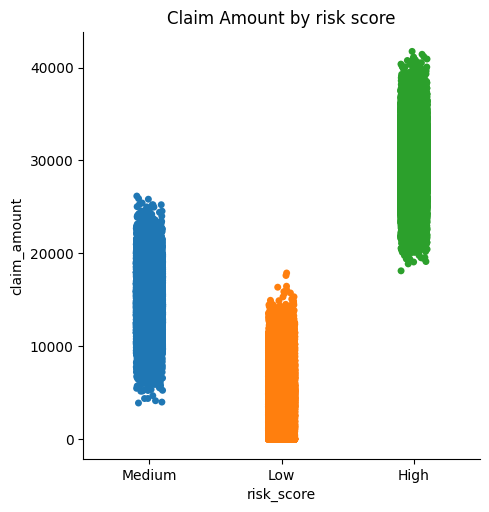

In [45]:
#-----------------------------------------------------------EDA(Eploratory Data Analysis)-----------------------------------------------------------

sns.catplot(data=df, x="risk_score", y="claim_amount", hue="risk_score")
plt.title("Claim Amount by risk score")
plt.show()

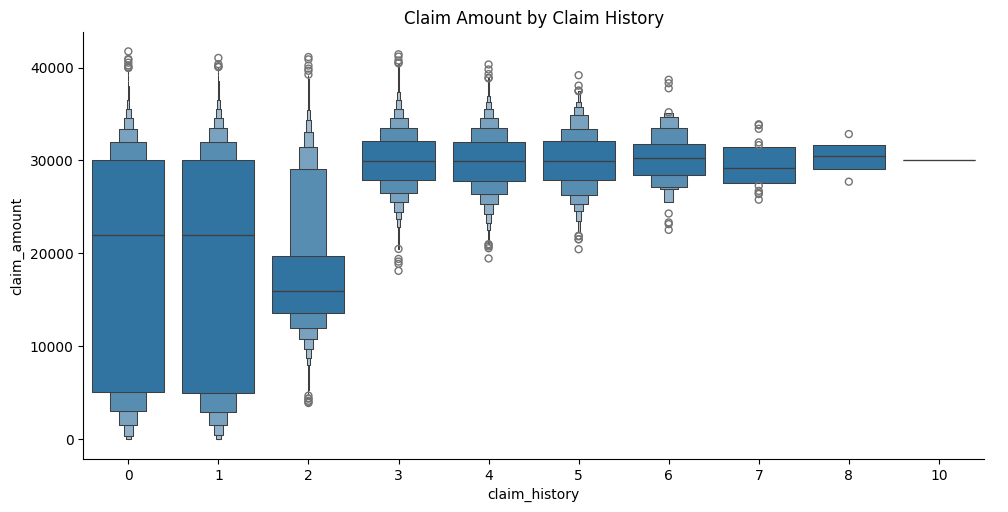

In [46]:
sns.catplot(data=df, x="claim_history", y="claim_amount", kind="boxen", aspect=2, height=5)
plt.title("Claim Amount by Claim History")
plt.show()

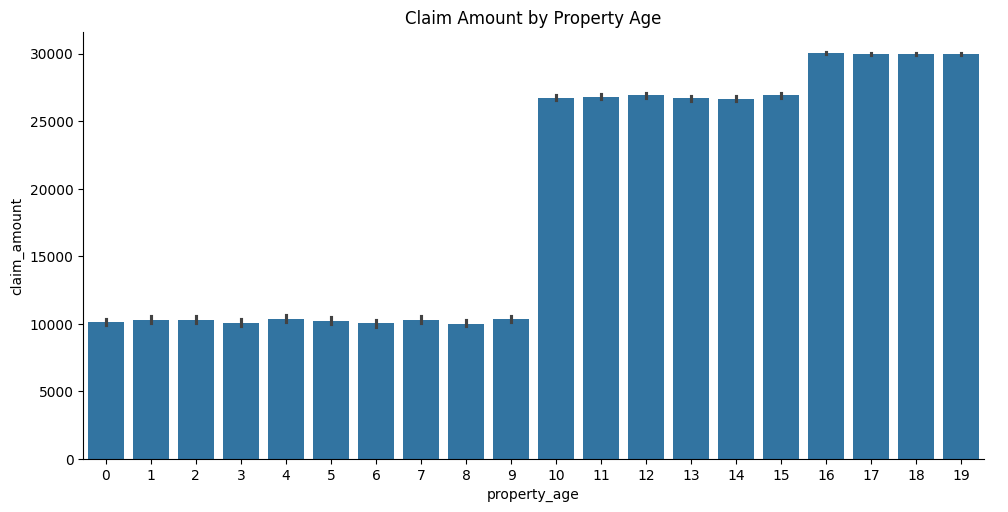

In [47]:
sns.catplot(data=df, x="property_age", y="claim_amount", kind="bar", aspect=2, height=5)
plt.title("Claim Amount by Property Age")
plt.show()

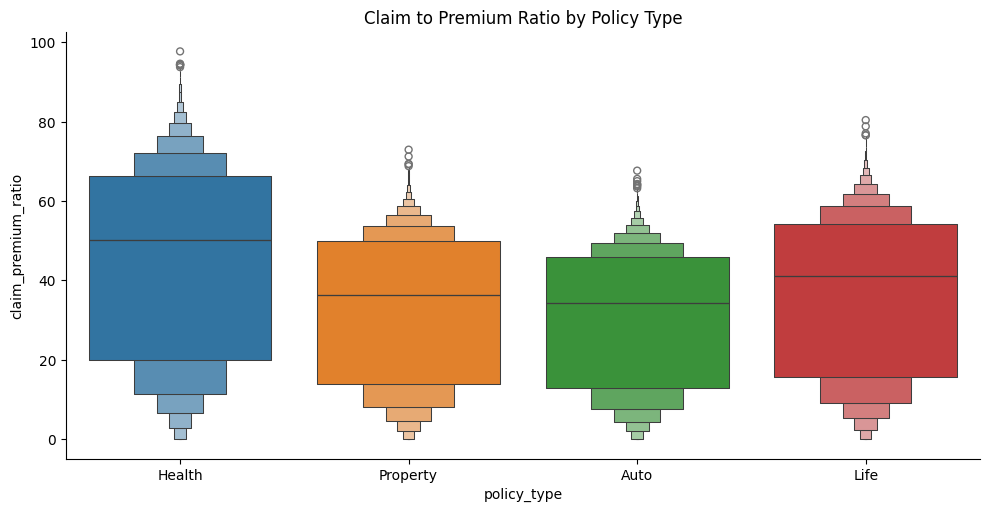

In [51]:
df["claim_premium_ratio"] = df["claim_amount"] / df["premium_amount"]

sns.catplot(data=df, x="policy_type", y="claim_premium_ratio", hue="policy_type", kind="boxen", aspect=2, height=5)
plt.title("Claim to Premium Ratio by Policy Type")
plt.show()

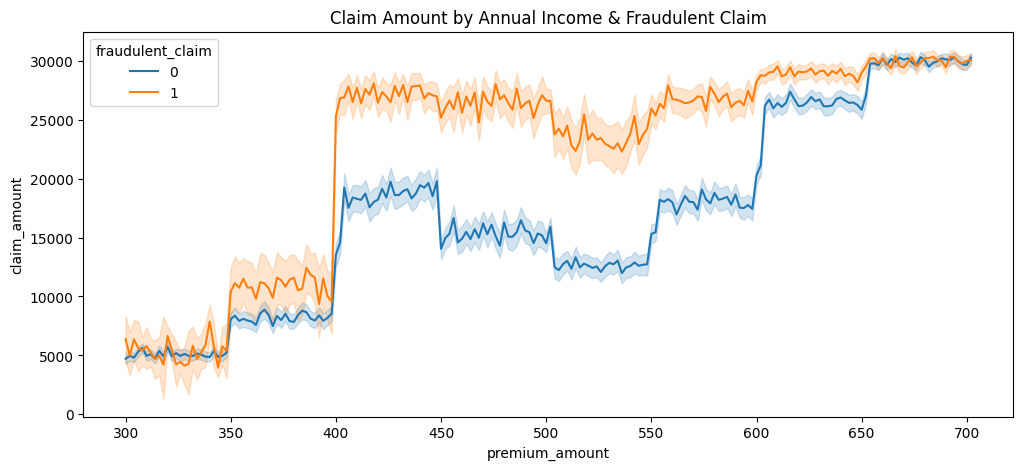

In [50]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="premium_amount", y="claim_amount", hue="fraudulent_claim")
plt.title("Claim Amount by Annual Income & Fraudulent Claim")
plt.show()

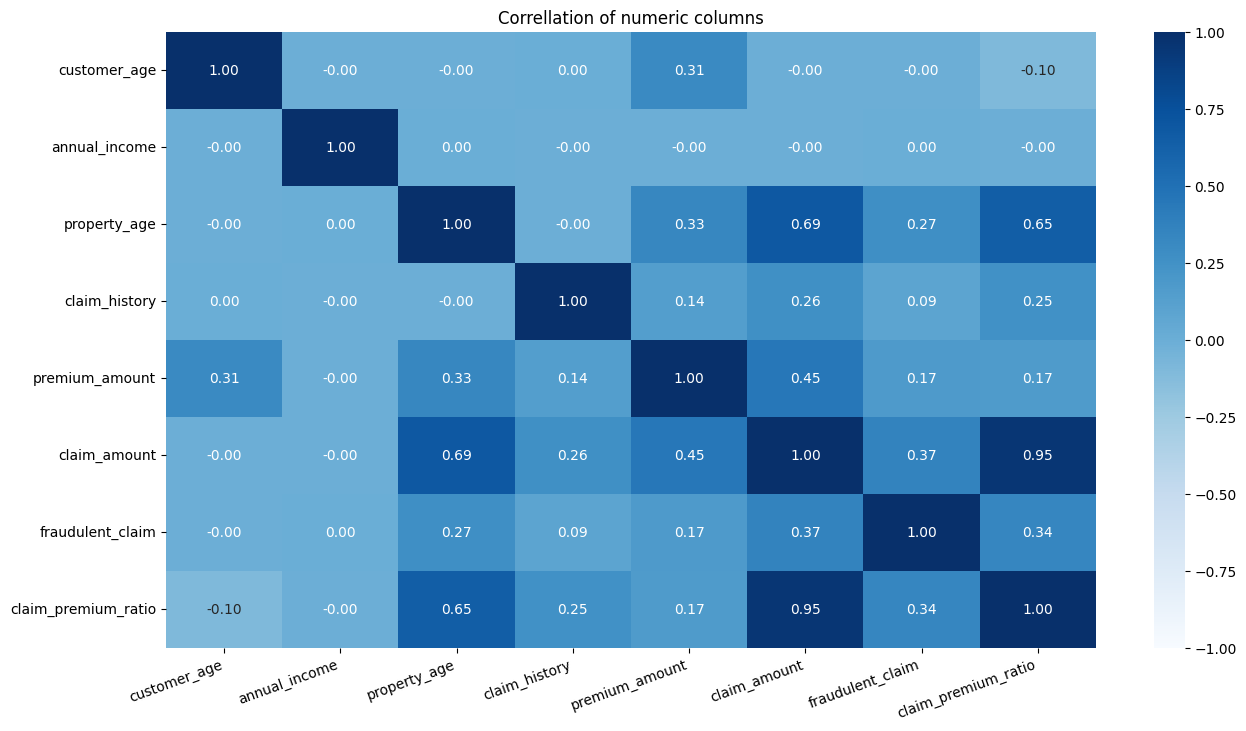

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", vmin=-1, vmax=1,cmap="Blues")
plt.title("Correllation of numeric columns")
plt.xticks(rotation=20,ha="right")
plt.show()

In [14]:
# One Hot Encoding
encode = df[["gender", "policy_type"]]
one_hot_encode = pd.get_dummies(encode,columns=["gender", "policy_type"], drop_first=True).astype(int)

In [15]:
# Label Encoding
df["risk_score"] = LabelEncoder().fit_transform(df["risk_score"])

In [16]:
# drop columns & insert the one hot encoded columns
feature = df.drop(columns=["gender", "policy_type"],inplace=True)
feature = pd.concat([df,one_hot_encode], axis=1)

In [17]:
x = feature.drop(columns=["policy_id", "claim_amount"])
y = feature["claim_amount"]

In [18]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
# feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
model = LinearRegression()

In [21]:
model.fit(x_train_scaled, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test_scaled)

In [23]:
mean_absolute_error(y_test,y_pred)

1147.7357358601737

In [24]:
mean_squared_error(y_test,y_pred)

2053469.060921814

In [25]:
r2_score(y_test,y_pred)

0.9849043715940731

In [26]:
import sklearn.metrics as metrics

models = {
    "LinearRegression" : LinearRegression(),
    "Ridge" : Ridge(),
    "Lasso" : Lasso(),
    "ElasticNet" : ElasticNet()
}

result = []
for cls_name, model in models.items():
    trained_model = model.fit(x_train_scaled, y_train)
    y_pred = trained_model.predict(x_test_scaled)

    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = metrics.mean_squared_error(y_test, y_pred) ** 0.5
    R2 = metrics.r2_score(y_test, y_pred)

    result.append({"cls": cls_name, "mean_absolute_error": MAE, "mean_squared_error": MSE, "Root_mean_squared_error": RMSE, "r2_score": R2})

In [27]:
result = pd.DataFrame(result)
result

,cls,mean_absolute_error,mean_squared_error,Root_mean_squared_error,r2_score
0,LinearRegression,1147.735736,2.053469e+06,1432.993043,0.984904
1,Ridge,1147.725627,2.053455e+06,1432.988142,0.984904
2,Lasso,1147.344653,2.053311e+06,1432.937827,0.984906
3,ElasticNet,2864.170574,1.199342e+07,3463.151771,0.911833


In [28]:
model = Pipeline([
    ("scaler", scaler),
    ("model", model)
])
joblib.dump(model, "C:/Users/91801/Desktop/Insurance Project/models/claim_amount.pkl")

['C:/Users/91801/Desktop/Insurance Project/models/claim_amount.pkl']

In [29]:
model = joblib.load("C:/Users/91801/Desktop/Insurance Project/models/claim_amount.pkl")
model.predict([[51,48698.10,1,3,0,466,1,63.901931,1,1,0,0]])

C:\Users\91801\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([26661.51047399])